# Analyze and visualize last.fm listening history

This shit dont work unless you clean your library regularly. 

make sure to regulary beet ur music
http://beets.io/

The csv data files were created with [lastfm_downloader.ipynb](lastfm_downloader.ipynb)

In [2]:
import pandas as pd, numpy as np, string, re, pytz
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from datetime import datetime as dt
%matplotlib inline

In [3]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')
ticks_font_h = fm.FontProperties(family=family, style='normal', size=10.5, weight='normal', stretch='normal')

In [4]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    import matplotlib.cm as cm, numpy as np
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

## Top artists

In [5]:
artists_most = pd.read_csv('data/lastfm_top_artists.csv', encoding='utf-8')
artists_most = artists_most.set_index('artist')['play_count'].head(25)
artists_most.head()

artist
blink-182       538
Sum 41          481
Silverstein     480
Rise Against    467
Eminem          429
Name: play_count, dtype: int64

c:\python27\lib\site-packages\matplotlib\font_manager.py:1282: UserWarning: findfont: Font family [u'Myriad Pro'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


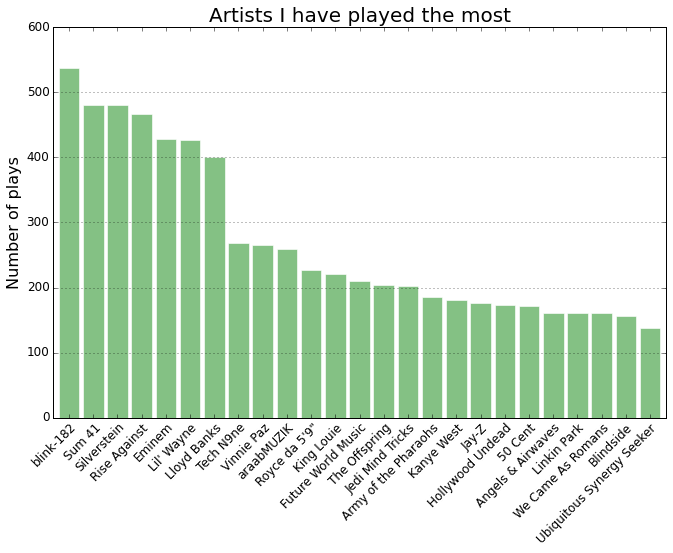

In [6]:
ax = artists_most.plot(kind='bar', figsize=[11, 7], width=0.85, alpha=0.6, color='#339933', edgecolor='w')

ax.yaxis.grid(True)
ax.set_xticklabels(artists_most.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Artists I have played the most', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of plays', fontproperties=label_font)

plt.savefig('images/lastfm-artists-played-most.png', dpi=96, bbox_inches='tight')
plt.show()

## Top tracks

In [7]:
tracks_most = pd.read_csv('data/lastfm_top_tracks.csv', encoding='utf-8')
index = tracks_most.apply(lambda x: u'{}\n{}'.format(x['artist'], x['track']), axis='columns')
tracks_most = tracks_most.set_index(index).drop(labels=['artist', 'track'], axis='columns')
tracks_most = tracks_most['play_count'].head(20)
tracks_most.head()

blink-182\nAliens Exist               39
Skillet\nMonster                      36
blink-182\nEasy Target                34
Lil' Wayne\nNo Worries Feat Detail    32
Jay-Z\nHate (feat. Kanye West)        31
Name: play_count, dtype: int64

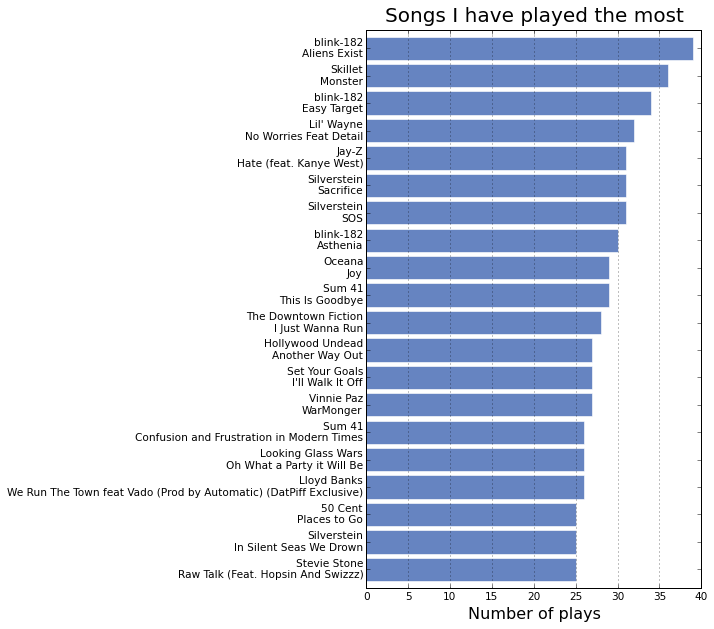

In [8]:
ax = tracks_most.sort_values().plot(kind='barh', figsize=[6, 10], width=0.85, alpha=0.6, color='#003399', edgecolor='w')
ax.xaxis.grid(True)
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)
ax.set_xlabel('Number of plays', fontproperties=label_font)
ax.set_ylabel('', fontproperties=label_font)
ax.set_title('Songs I have played the most', fontproperties=title_font, y=1.005)

plt.savefig('images/lastfm-tracks-played-most-h.png', dpi=96, bbox_inches='tight')
plt.show()

## Top albums

In [9]:
albums_most = pd.read_csv('data/lastfm_top_albums.csv', encoding='utf-8')
index = albums_most.apply(lambda x: u'{}\n{}'.format(x['artist'], x['album']), axis='columns')
albums_most = albums_most.set_index(index).drop(labels=['artist', 'album'], axis='columns')
albums_most = albums_most['play_count'].head(30)
albums_most.head()

Silverstein\nA Shipwreck in the Sand (Deluxe Edition)    125
Silverstein\nRescue                                      119
Vinnie Paz\nGod of The Serengeti                         107
Silverstein\nThis Is How the Wind Shifts                 106
Vinnie Paz\nSeason of the Assassin                       103
Name: play_count, dtype: int64

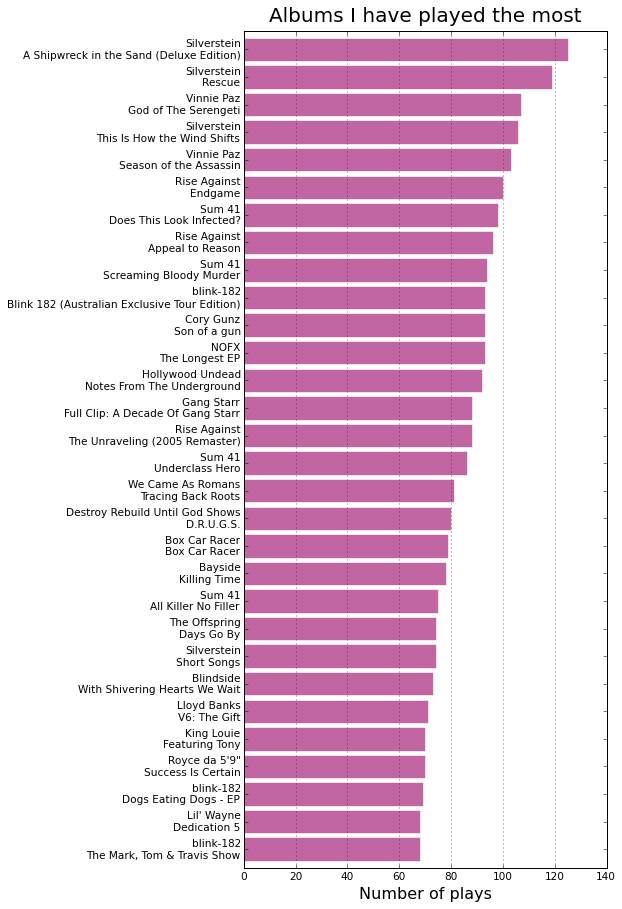

In [10]:
ax = albums_most.sort_values().plot(kind='barh', figsize=[6.5, 15], width=0.85, alpha=0.6, color='#990066', edgecolor='w')
ax.xaxis.grid(True)
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)
ax.set_xlabel('Number of plays', fontproperties=label_font)
ax.set_ylabel('', fontproperties=label_font)
ax.set_title('Albums I have played the most', fontproperties=title_font, y=1.005)

plt.savefig('images/lastfm-albums-played-most-h.png', dpi=96, bbox_inches='tight')
plt.show()

## All-time scrobbles

In [11]:
# read the all-time scrobbles data set
scrobbles = pd.read_csv('data/lastfm_scrobbles.csv', encoding='utf-8')
scrobbles = scrobbles.drop('timestamp', axis=1)
print '{:,} total scrobbles'.format(len(scrobbles))
print '{:,} total artists'.format(len(scrobbles['artist'].unique()))

18,631 total scrobbles
860 total artists


According to the last.fm web site, I have ~262,000 scrobbles. This API endpoint seems to miss the ones from before 2007.

In [12]:
# convert to datetime
scrobbles['timestamp'] = pd.to_datetime(scrobbles['datetime'])

In [13]:
# functions to convert UTC to Pacific time zone and extract date/time elements
convert_tz = lambda x: x.to_datetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('US/Pacific'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_day_of_week = lambda x: convert_tz(x).weekday()

These lambda functions are inefficient, but necessary to workaround this bug: https://github.com/pydata/pandas/issues/11757. I can update them when the bug is fixed in a future pandas version.

In [14]:
# parse out date and time elements as pacific time
scrobbles['year'] = scrobbles['timestamp'].map(get_year)
scrobbles['month'] = scrobbles['timestamp'].map(get_month)
scrobbles['day'] = scrobbles['timestamp'].map(get_day)
scrobbles['hour'] = scrobbles['timestamp'].map(get_hour)
scrobbles['dow'] = scrobbles['timestamp'].map(get_day_of_week)
scrobbles = scrobbles.drop(labels=['datetime'], axis=1)

# drop rows with 01-01-1970 as timestamp
scrobbles = scrobbles[scrobbles['year'] > 1970]
scrobbles.head()

,artist,artist_mbid,album,album_mbid,track,track_mbid,timestamp,year,month,day,hour,dow
0,Bring Me the Horizon,074e3847-f67f-49f9-81f1-8c8cea147e8e,Sempiternal,86f705ee-242f-4e89-896c-f95bb3044189,Can You Feel My Heart,863dd3b3-c525-427c-a0fb-faa75b1dde37,2016-05-11 21:24:24,2016,2016-05,11,14,2
1,Young Thug,800760de-bdf8-43a2-8fe0-44a2401a5515,Barter 6,NaN,Halftime,NaN,2016-05-11 21:20:14,2016,2016-05,11,14,2
2,Dance Gavin Dance,16456fed-c9f2-4adf-b6ea-97b648c474d2,Instant Gratification,NaN,Death Of A Strawberry,NaN,2016-05-11 21:07:43,2016,2016-05,11,14,2
3,Tech N9ne,dde3d9b1-0e44-48bc-b0c9-d739b3570000,Absolute Power,dea8d7d1-1823-4635-a536-8ca487a91e8c,Here Comes Tecca Nina,f8e3754a-ca1f-494f-ac03-9ceb32545726,2016-05-11 21:03:42,2016,2016-05,11,14,2
4,Bankroll Mafia,NaN,Bankroll Mafia,NaN,"Neg 4 Degrees (feat. Shad Da God, Young Thug &...",NaN,2016-05-11 20:58:20,2016,2016-05,11,13,2


All the last.fm timestamps of my scrobbles appear to be UTC, but the year, month, day, hour columns are now converted to Pacific Time (where I've done nearly all my listening)

## Year-by-year analysis

Visualize the number of scrobbles per year

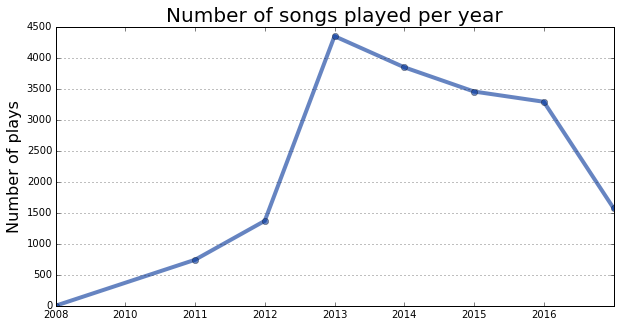

In [15]:
year_counts = scrobbles['year'].value_counts().sort_index()
ax = year_counts.plot(kind='line', figsize=[10, 5], linewidth='4', alpha=0.6, marker='o', color='#003399')

ax.yaxis.grid(True)
ax.set_xticklabels(year_counts.index, rotation=0, rotation_mode='anchor', ha='center')
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per year', fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-year.png', dpi=96, bbox_inches='tight')
plt.show()

## Month-by-month analysis

Visualize the number of scrobbles per month from 2010 through the present day

In [16]:
# get all the scrobbles from 2010-present
min_year = 2010
scrobbles_10 = scrobbles[scrobbles['year'] >= min_year]
max_year = max(scrobbles_10['year'])

In [17]:
# count number of scrobbles in each month
month_counts = scrobbles_10['month'].value_counts().sort_index()

# not every month necessarily has a scrobble, so fill in missing months with zero counts
date_range = pd.date_range(start=min(scrobbles_10['timestamp']), end=max(scrobbles_10['timestamp']), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)
month_counts = month_counts.reindex(index, fill_value=0)

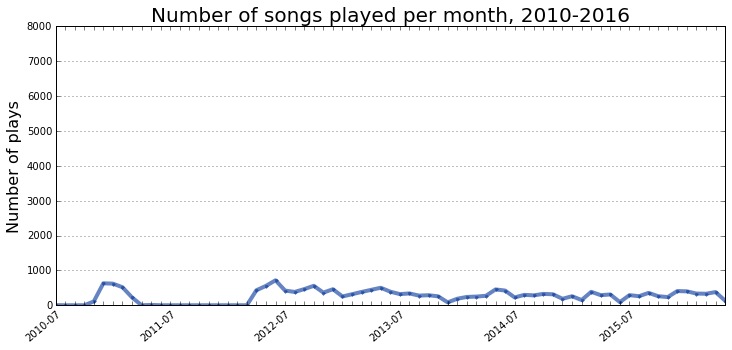

In [18]:
ax = month_counts.plot(kind='line', figsize=[12, 5], linewidth='4', alpha=0.6, marker='.', color='#003399')

xlabels = month_counts.iloc[range(0, len(month_counts), 12)].index
xlabels = [x if x in xlabels else '' for x in month_counts.index]
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=40, rotation_mode='anchor', ha='right')

ax.yaxis.grid(True)
ax.set_ylim((0,8000))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per month, {}-{}'.format(min_year, max_year), fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-month.png', dpi=96, bbox_inches='tight')
plt.show()

## Day of the week analysis

How many songs have been played on each day of the week?

In [19]:
# get the play count sum by day of the week
dow_counts = scrobbles['dow'].value_counts().sort_index()
dow_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

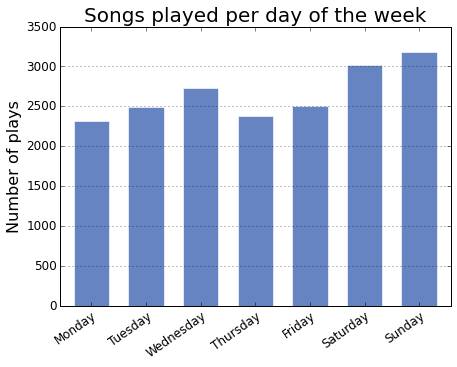

In [20]:
ax = dow_counts.plot(kind='bar', figsize=[7, 5], width=0.65, alpha=0.6, color='#003399', edgecolor='w')

ax.yaxis.grid(True)
ax.set_xticklabels(dow_counts.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Songs played per day of the week', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of plays', fontproperties=label_font)

plt.savefig('images/lastfm-scrobbles-per-weekday.png', dpi=96, bbox_inches='tight')
plt.show()

## Hour of the day analysis

How many songs have been played during each hour of the day?

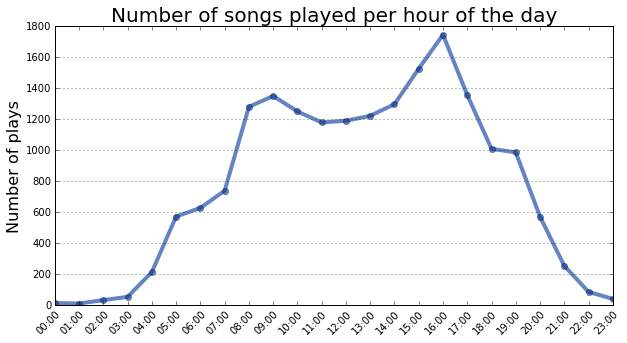

In [21]:
hour_counts = scrobbles['hour'].value_counts().sort_index()
ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth='4', alpha=0.6, marker='o', color='#003399')

xlabels = hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.yaxis.grid(True)
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per hour of the day', fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-hour.png', dpi=96, bbox_inches='tight')
plt.show()

## Analysis by day of the week + hour of the day

How many songs have been played during each hour of the day on each day of the week?

In [22]:
# get the play counts by hour of day and day of week
weekday_hour_counts = scrobbles.groupby(['dow','hour']).count()['track']
hour_numbers = weekday_hour_counts.index.levels[1]
day_numbers = weekday_hour_counts.index.levels[0]
day_names = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

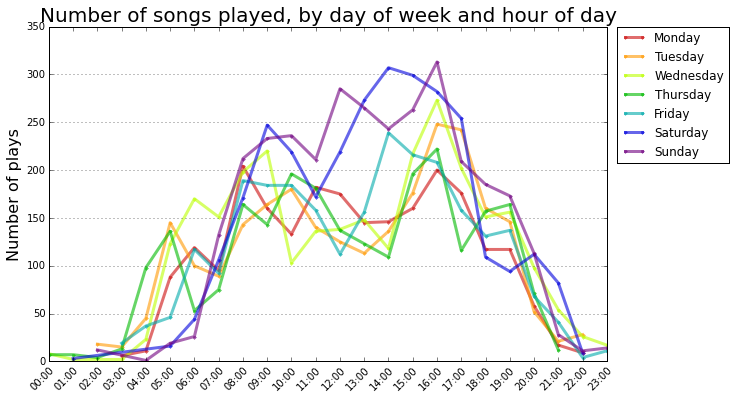

In [72]:
# get one color per day of week
colors = get_colors('spectral', n=len(day_numbers), start=0.05, stop=0.95, reverse=True)

fig, ax = plt.subplots(figsize=[10, 6])
lines = []
for day, c in zip(day_numbers, colors):
    ax = weekday_hour_counts[day].plot(kind='line', linewidth='3', alpha=0.6, marker='.', color=c)
    lines.append(day_names[day])
    
xlabels = hour_numbers.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.yaxis.grid(True)
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played, by day of week and hour of day', fontproperties=title_font)
ax.legend(lines, loc='upper right', bbox_to_anchor=(1.23,1.017))

plt.savefig('images/lastfm-scrobbles-days-hours.png', dpi=96, bbox_inches='tight')
plt.show()

## Analysis of a single year (or multiple years)

Add additional years to the 'isin' list to query multiple years.

In [46]:
scrobbles_year = scrobbles[scrobbles['year'].isin([2016])]
len(scrobbles_year)

1575

In [47]:
# what artists did i play the most that year?
artists_year = scrobbles_year['artist'].value_counts()
artists_year = pd.DataFrame(artists_year).reset_index().rename(columns={'artist':'play count', 'index':'artist'})
artists_year.index = [n + 1 for n in artists_year.index]
artists_year.head(10)

,artist,play count
1,King Louie,87
2,I See Stars,50
3,Kanye West,45
4,Conditions,45
5,Young Thug,41
6,Bankroll Mafia,40
7,Lil' Wayne,39
8,Sum 41,34
9,Eminem,31
10,Brendan Rivera,29


In [48]:
# what tracks did i play the most that year?
tracks_year = scrobbles_year.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)
tracks_year = tracks_year.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]
tracks_year.index = [n + 1 for n in tracks_year.index]
tracks_year.head(10)

,artist,track,play count
1,King Louie,Dum Dum Freestyle,13
2,Brendan Rivera,Stumbling,10
3,I See Stars,Youth,8
4,Bankroll Mafia,"Neg 4 Degrees (feat. Shad Da God, Young Thug &...",7
5,PARTYNEXTDOOR,No Feelings (Feat. Ca$h Out & Travi$ Scott) (R...,7
6,Conditions,WALKING SEPARATE WAYS,6
7,Brendan Rivera,Dance. Sing. Clap,6
8,Drake,Pop Style,6
9,King Louie,Chicago Consious,6
10,King Louie,Golden Pharoah,6


In [49]:
# what albums did i play the most that year?
albums_year = scrobbles_year.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums_year = albums_year.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'album', 'play count']]
albums_year.index = [n + 1 for n in albums_year.index]

# remove text in parentheses or brackets
regex = re.compile(u'\\(.*\\)|\\[.*]')
albums_year['album'] = albums_year['album'].map(lambda x: regex.sub(u'', x))
albums_year.head(10)

,artist,album,play count
1,King Louie,Featuring Tony,70
2,Bankroll Mafia,Bankroll Mafia,40
3,Kanye West,The Life Of Pablo,34
4,I See Stars,Phases,24
5,Conditions,Fluorescent Youth,23
6,Brendan Rivera,The Musician,21
7,Samiyam,Animals Have Feelings,18
8,Pusha T,Darkest Before Dawn: The Prelude,17
9,Turnover,Magnolia,17
10,Gang Starr,Full Clip: A Decade Of Gang Starr,16


## Analysis of a single month (or multiple months)

Add additional months to the 'isin' list to query multiple months.

In [50]:
scrobbles_month = scrobbles[scrobbles['month'].isin(['2014-02'])]
len(scrobbles_month)

239

In [52]:
# what artists did i play the most that month?
artists_month = scrobbles_month['artist'].value_counts()
artists_month = pd.DataFrame(artists_month).reset_index().rename(columns={'artist':'play count', 'index':'artist'})
artists_month.index = [n + 1 for n in artists_month.index]
artists_month.head(10)

,artist,play count
1,Silverstein,11
2,blink-182,10
3,Sum 41,9
4,Eminem,8
5,Ski Beatz,7
6,We Came As Romans,7
7,Rise Against,7
8,Lil' Wayne,6
9,Vespertina,6
10,Lloyd Banks,5


In [53]:
# what tracks did i play the most that month?
tracks_month = scrobbles_month.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)
tracks_month = tracks_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]
tracks_month.index = [n + 1 for n in tracks_month.index]
tracks_month.head(10)

,artist,track,play count
1,"Royce da 5'9""",Merry Go Round,3
2,Hoobastank,Out Of Control,2
3,Bei Maejor feat. Waka Flocka Flame,Lights Down Low,2
4,Hollywood Undead,Medicine,2
5,Jedi Mind Tricks,Fuck Ya Life (feat. Blacastan),2
6,Tito Lopez,Conversation With Tito,2
7,Skillet,Earth Invasion,2
8,Ski Beatz,"Go (feat. Jim Jones, Curren$y)",2
9,Simple Plan,Running Out Of time [Bonus Track],2
10,Silverstein,SOS,2


In [55]:
# what albums did i play the most that month?
albums_month = scrobbles_month.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums_month = albums_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'album', 'play count']]
albums_month.index = [n + 1 for n in albums_month.index]
albums_month.head(10)

,artist,album,play count
1,Ski Beatz,24 Hour Karate School,7
2,Vespertina,The Waiting Wolf,6
3,Silverstein,This Is How the Wind Shifts,5
4,We Came As Romans,Tracing Back Roots,5
5,Viktor Vaughn,Venomous Villain,4
6,Bad Meets Evil,Hell: The Sequel Deluxe Edition,4
7,Sum 41,Does This Look Infected?,3
8,"Royce da 5'9""",Success Is Certain,3
9,Rise Against,Appeal to Reason,3
10,Hollywood Undead,Notes From The Underground,3


## Listening history of a specific artist, album, or track

See the last 5 times I've listened to someone or something

In [57]:
# when were the last 5 times I played something by My Bloody Valentine?
scrobbles[scrobbles['artist'].str.contains('Young Thug')].head()

,artist,artist_mbid,album,album_mbid,track,track_mbid,timestamp,year,month,day,hour,dow
1,Young Thug,800760de-bdf8-43a2-8fe0-44a2401a5515,Barter 6,NaN,Halftime,NaN,2016-05-11 21:20:14,2016,2016-05,11,14,2
39,Young Thug,800760de-bdf8-43a2-8fe0-44a2401a5515,I'm Up,NaN,Ridin (Ft. Lil Durk),NaN,2016-05-07 17:08:07,2016,2016-05,7,10,5
60,Young Thug,800760de-bdf8-43a2-8fe0-44a2401a5515,1017 Thug 3 (The Finale),NaN,1017 Thug3 Intro (Beast Mode) [feat. Gucci Mane],NaN,2016-05-06 18:49:44,2016,2016-05,6,11,4
74,Young Thug,800760de-bdf8-43a2-8fe0-44a2401a5515,Barter 6,NaN,Halftime,NaN,2016-05-03 15:33:03,2016,2016-05,3,8,1
78,Young Thug,800760de-bdf8-43a2-8fe0-44a2401a5515,I'm Up,NaN,F Cancer (Boosie) (Ft. Quavo),NaN,2016-05-03 15:16:57,2016,2016-05,3,8,1


In [66]:
# when were the last 5 times I played something off of Double Nickels on the Dime?
scrobbles[scrobbles['album'].fillna('').str.contains('Violence Begets Violence')].head()

,artist,artist_mbid,album,album_mbid,track,track_mbid,timestamp,year,month,day,hour,dow
1461,Jedi Mind Tricks,c7732cf8-e9a1-46f1-9133-84d930f3187a,Violence Begets Violence,f99488e3-ae5a-419d-aa66-c91de67c99a9,Carnival of Souls (feat. Demoz),NaN,2016-01-10 19:57:53,2016,2016-01,10,11,6
1983,Jedi Mind Tricks,c7732cf8-e9a1-46f1-9133-84d930f3187a,Violence Begets Violence,f99488e3-ae5a-419d-aa66-c91de67c99a9,The Sacrilege of Fatal Arms,f9134bf0-9035-4c76-8c39-62bfa484179b,2015-11-30 22:30:37,2015,2015-11,30,14,0
2632,Jedi Mind Tricks,c7732cf8-e9a1-46f1-9133-84d930f3187a,Violence Begets Violence,f99488e3-ae5a-419d-aa66-c91de67c99a9,Target Practice,b6198d19-b20f-419c-b0e2-d61788589139,2015-09-13 20:29:08,2015,2015-09,13,13,6
2828,Jedi Mind Tricks,c7732cf8-e9a1-46f1-9133-84d930f3187a,Violence Begets Violence,f99488e3-ae5a-419d-aa66-c91de67c99a9,Fuck Ya Life (feat. Blacastan),NaN,2015-09-01 13:28:36,2015,2015-09,1,6,1
3455,Jedi Mind Tricks,c7732cf8-e9a1-46f1-9133-84d930f3187a,Violence Begets Violence,f99488e3-ae5a-419d-aa66-c91de67c99a9,Burning the Mirror,9a2c90ef-57bb-4634-9b9f-ca1a338cd9db,2015-06-01 19:34:21,2015,2015-06,1,12,0


In [67]:
# when were the last 5 times I played Personality Crisis?
scrobbles[scrobbles['track'].str.contains('Kick in the Door')].head()

,artist,artist_mbid,album,album_mbid,track,track_mbid,timestamp,year,month,day,hour,dow
19,The Notorious B.I.G.,d5d97b2b-b83b-4976-814a-056d9076c8c3,Life After Death CD1 [by Hillside],NaN,Kick in the Door,6ac06c78-d909-4b07-918d-26bfc68ac0c7,2016-05-08 17:13:26,2016,2016-05,8,10,6
773,The Notorious B.I.G.,d5d97b2b-b83b-4976-814a-056d9076c8c3,Life After Death CD1 [by Hillside],NaN,Kick in the Door,6ac06c78-d909-4b07-918d-26bfc68ac0c7,2016-03-06 20:03:28,2016,2016-03,6,12,6
892,The Notorious B.I.G.,d5d97b2b-b83b-4976-814a-056d9076c8c3,Life After Death CD1 [by Hillside],NaN,Kick in the Door,6ac06c78-d909-4b07-918d-26bfc68ac0c7,2016-02-25 22:32:59,2016,2016-02,25,14,3
4484,The Notorious B.I.G.,d5d97b2b-b83b-4976-814a-056d9076c8c3,Life After Death CD1 [by Hillside],NaN,Kick in the Door,6ac06c78-d909-4b07-918d-26bfc68ac0c7,2015-02-15 04:06:37,2015,2015-02,14,20,5
8623,The Notorious B.I.G.,d5d97b2b-b83b-4976-814a-056d9076c8c3,Life After Death CD1 [by Hillside],NaN,Kick in the Door,6ac06c78-d909-4b07-918d-26bfc68ac0c7,2013-11-04 02:19:21,2013,2013-11,3,18,6


## Visualize top artists over time

How have the cumulative plays of most listened-to artists changed over time?

In [75]:
# get the cumulative play counts since 2009 for the top n most listened-to artists
n = 9
plays = scrobbles[scrobbles['artist'].isin(artists_most.head(n).index)]
plays = plays[plays['year'] >= 2008]
plays = plays.groupby(['artist','year']).count().groupby(level=[0]).cumsum()['track']
top_artists = plays.index.levels[0]

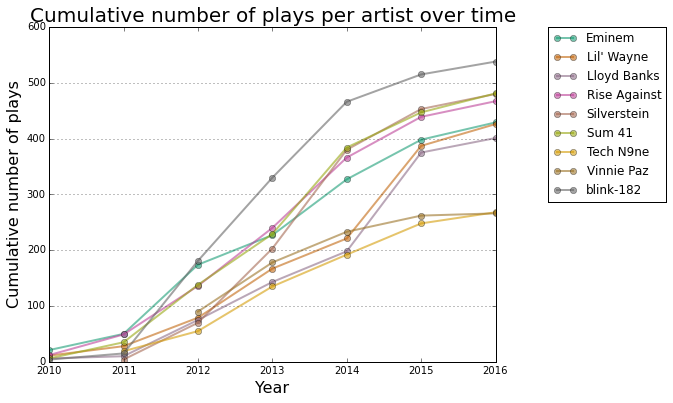

In [76]:
# get one color per artist
colors = get_colors('Dark2', n)

fig, ax = plt.subplots(figsize=[8, 6])
lines = []
for artist, c in zip(top_artists, colors):
    ax = plays[artist].plot(kind='line', linewidth='2', alpha=0.6, marker='o', color=c)
    lines.append(artist)
    
ax.yaxis.grid(True)
ax.set_xticklabels(plays.index.levels[1], rotation=0, rotation_mode='anchor', ha='center')
ax.set_ylabel('Cumulative number of plays', fontproperties=label_font)
ax.set_xlabel('Year', fontproperties=label_font)
ax.set_title('Cumulative number of plays per artist over time', fontproperties=title_font)
ax.legend(lines, loc='upper right', bbox_to_anchor=(1.395,1.017))

plt.savefig('images/lastfm-scrobbles-top-artists-years.png', dpi=96, bbox_inches='tight')
plt.show()

## Characteristics of artists' names

Text analysis of artist name strings

In [37]:
# remove 'The ' preceding artist names, get unique set of names, then get first letter frequency
artists_clean = scrobbles['artist'].str.replace('The ','')
first_letters = pd.Series(artists_clean.unique()).map(lambda x: x.upper()[0]).value_counts()
first_letters = first_letters[[c for c in string.uppercase]]

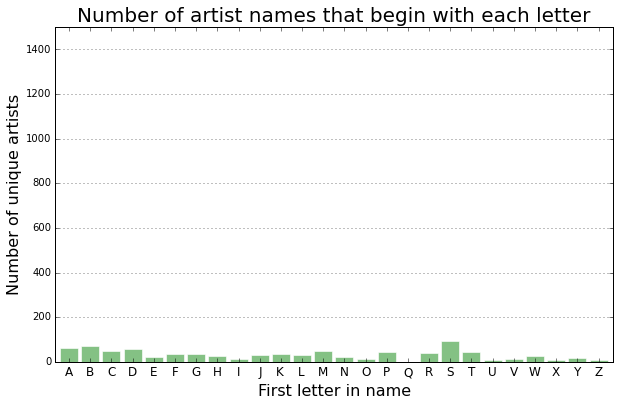

In [38]:
# plot the frequency of artist names that begin with each letter
ax = first_letters.plot(kind='bar', figsize=[10, 6], width=0.85, alpha=0.6, color='#339933', edgecolor='w')
ax.yaxis.grid(True)
ax.set_ylim((0, 1500))
ax.set_xticklabels(first_letters.index, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)

ax.set_title('Number of artist names that begin with each letter', fontproperties=title_font)
ax.set_xlabel('First letter in name', fontproperties=label_font)
ax.set_ylabel('Number of unique artists', fontproperties=label_font)

plt.savefig('images/lastfm-artists-first-letter-count.png', dpi=96, bbox_inches='tight')
plt.show()

In [39]:
# which artist names begin with the letter 'X'?
pd.Series(artists_clean[artists_clean.str.upper().str.startswith('X')].unique())

0                                    X-Ray Dog
1                                       Xzibit
2    Xzibit, B Real & Demrick (Serial Killers)
3                                           XV
4                                       Xaniar
5                                           xx
dtype: object

In [40]:
# what are the most common first words in artist names that begin with 'M'?
artists_m = pd.Series(artists_clean[artists_clean.str.upper().str.startswith('M')].unique())
artists_m.map(lambda x: x.split()[0]).value_counts().head(15)

Mohammad     3
My           3
Mike         2
Mayday       2
M.O.P.       1
Mista        1
Metro        1
Mindless     1
Mt           1
Melbourne    1
Major        1
M            1
Madina       1
Miike        1
Mobb         1
dtype: int64

In [41]:
# what are the most common first words in all the artist names?
pd.Series(artists_clean.unique()).map(lambda x: x.split()[0].lower()).value_counts().head(15)

dj        13
young      6
david      4
gucci      4
red        4
eminem     4
chris      4
we         4
wiz        4
king       4
steve      4
kevin      4
lil        4
a          4
asher      3
dtype: int64

In [42]:
# what are the most common words in all the artist names, anywhere in the name?
word_list = []
stop_list = ['&','the','and','of','a','and','in','for','la','de']
for artist in artists_clean.unique():
    for word in artist.split():
        word_list.append(word.lower())

word_list = [word for word in word_list if word not in stop_list]
pd.Series(word_list).value_counts().head(15)

feat.     24
dj        14
lil       12
,         12
ft.       12
wayne      9
young      9
eminem     8
king       6
lil'       6
styles     6
jones      6
chris      5
gang       5
we         5
dtype: int64

In [43]:
# what is the longest artist name?
print max(artists_clean, key=len)

DJ Khaled , Ludacris , T-Pain , Busta Rhymes , Mavado , Twista , Birdman , Ace Hood , Fat Joe , Jadakiss , Bun B , Game , Waka Flocka


In [44]:
# what is the distribution of lengths of artist names (number of characters)?
name_lengths = pd.Series([len(artist) for artist in artists_clean.unique()])
name_lengths = name_lengths.value_counts().sort_index()
name_lengths = name_lengths.iloc[0:51].reindex(range(51), fill_value=0)

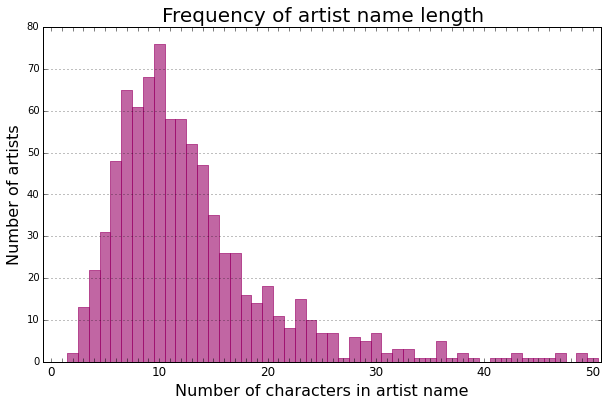

In [45]:
ax = name_lengths.plot(kind='bar', figsize=(10,6), alpha=0.6, width=1, color='#990066', edgecolor='#990066')

xlabels = [x if x % 10 == 0 else '' for x in name_lengths.index]
ax.set_xticklabels(xlabels, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)
ax.yaxis.grid(True)

ax.set_title('Frequency of artist name length', fontproperties=title_font)
ax.set_xlabel('Number of characters in artist name', fontproperties=label_font)
ax.set_ylabel('Number of artists', fontproperties=label_font)

plt.savefig('images/lastfm-artists-name-length.png', dpi=96, bbox_inches='tight')
plt.show()